## TEST 1. Using `DistilGPT2 (82M)`

> It was hard coded in the `train_lora.py` file and later updated to `gpt2`

In [1]:
from transformers import AutoTokenizer

download_path = "../MODELS/"

tokenizer = AutoTokenizer.from_pretrained(
    "distilgpt2",
    cache_dir=download_path,
    use_fast=True
)

## 1) Data preparation: convert JSON files → single-line text examples - `prepare_data.py`

In [2]:
from prepare_data import creat_training_data

## RUN ONLY ONCE
# creat_training_data()

## 2) Tokenizer adjustments

In [3]:
tokenizer

GPT2TokenizerFast(name_or_path='distilgpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}
)

In [4]:
# Specify special tokens used in the data
special_tokens = {
    "bos_token": "<|startofpiece|>",
    "eos_token": "<|endofpiece|>",
    "additional_special_tokens": [
        "<TRACKS>", "<TRACKSEP>", "<NAME=", "<BPM=", "<DURATION_BEATS=", "<DURATION_MINUTES="
    ],
}
    
# Add them to the tokenizer
tokenizer.add_special_tokens( special_tokens )

# Add pad token (reuse eos to keep model happy)
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

tokenizer


GPT2TokenizerFast(name_or_path='distilgpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|startofpiece|>', 'eos_token': '<|endofpiece|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endofpiece|>', 'additional_special_tokens': ['<TRACKS>', '<TRACKSEP>', '<NAME=', '<BPM=', '<DURATION_BEATS=', '<DURATION_MINUTES=']}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	50257: AddedToken("<|startofpiece|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	50258: AddedToken("<|endofpiece|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	50259: AddedToken("<TRACKS>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	50260: AddedToken("<TRACKSEP>", rstrip=False, lstrip=False, single_word

## 3) Training with LoRA (PEFT) - `train_lora.py`

> - **LoRA (Low-Rank Adaptation)** is a specific technique within the broader field of **Parameter-Efficient Fine-Tuning (PEFT)** that significantly reduces the computational cost and memory requirements of fine-tuning large language models (LLMs)
> - It works by **freezing** the **original** large model weights and **injecting small**, trainable "low-rank" matrices into its layers. These matrices decompose the weight updates into **two smaller matrices**, allowing for efficient training of only these **new parameters**, which can then be merged with the original weights to produce the adapted model. 
> - For a quick review about LoRA watch this: [**LoRA explained (and a bit about precision and quantization)**](https://www.youtube.com/watch?v=t509sv5MT0w&ab_channel=DeepFindr)

A **data collator** is a function or class that takes a batch of individual samples from a dataset (like tokenized text sequences, images, or audio) and assembles them into a format suitable for training a model.

For example, in NLP with Hugging Face, a collator will:

* **Pad sequences** so they’re the same length.
* **Create attention masks**.
* Optionally apply things like **masking for language modeling**.

In short: **it standardizes raw samples into properly shaped batches for the model**.


In [ ]:
from train_lora import train_lora

all_train_losses, all_val_losses, epoch_train_losses, epoch_val_losses = train_lora (tokenizer)

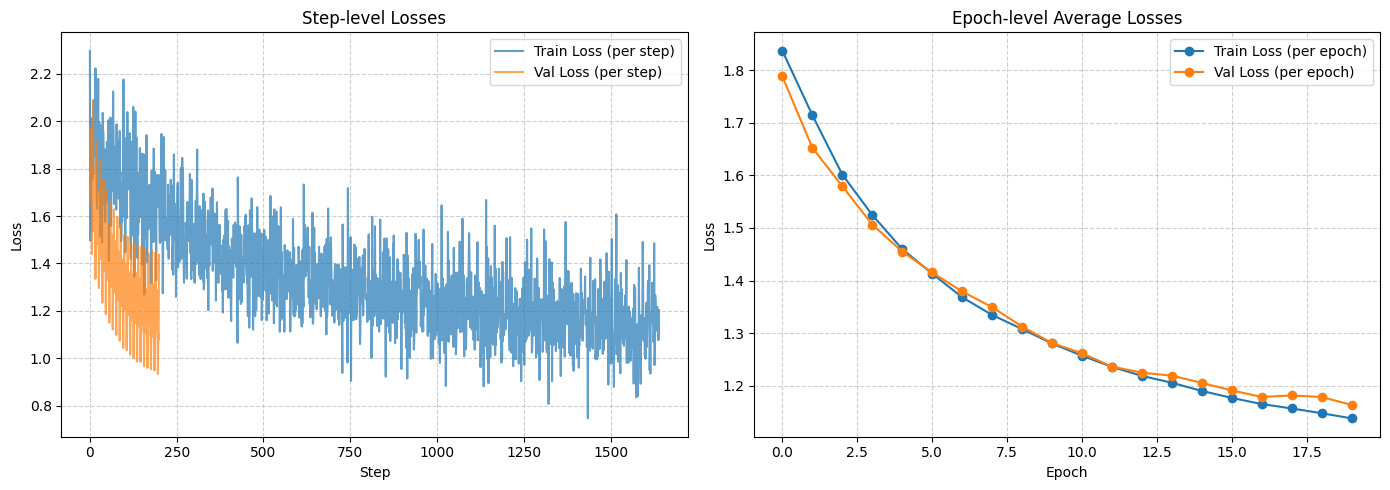

In [6]:
from train_lora import plot_losses

plot_losses(all_train_losses, all_val_losses, epoch_train_losses, epoch_val_losses)
